In [1]:
library(tidyverse)
library(effects)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.



In [2]:
df_credit = read_csv('../input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')
attach(df_credit)

Parsed with column specification:
cols(
  .default = col_double()
)

See spec(...) for full column specifications.



In [3]:
head(df_credit)
print(nrow(df_credit))

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,⋯,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,⋯,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,⋯,19394,19619,20024,2500,1815,657,1000,1000,800,0


[1] 30000


In [4]:
first_model <- glm(default.payment.next.month ~ .,data=df_credit,family=binomial)
summary(first_model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = default.payment.next.month ~ ., family = binomial, 
    data = df_credit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1565  -0.6993  -0.5470  -0.2902   3.8757  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.675e-01  1.212e-01  -5.510 3.59e-08 ***
ID          -1.338e-06  1.750e-06  -0.765 0.444396    
LIMIT_BAL   -7.615e-07  1.569e-07  -4.853 1.21e-06 ***
SEX         -1.083e-01  3.069e-02  -3.530 0.000415 ***
EDUCATION   -1.010e-01  2.098e-02  -4.815 1.47e-06 ***
MARRIAGE    -1.548e-01  3.171e-02  -4.883 1.05e-06 ***
AGE          7.419e-03  1.779e-03   4.170 3.05e-05 ***
PAY_0        5.771e-01  1.770e-02  32.611  < 2e-16 ***
PAY_2        8.316e-02  2.019e-02   4.119 3.81e-05 ***
PAY_3        7.173e-02  2.261e-02   3.172 0.001512 ** 
PAY_4        2.478e-02  2.503e-02   0.990 0.322168    
PAY_5        3.336e-02  2.689e-02   1.240 0.214797    
PAY_6        7.990e-03  2.213e-02   0.361 0.718036    
BILL_A

In [5]:
stepwise_regression_model <- step(first_model)
summary(stepwise_regression_model)

Start:  AIC=27926.62
default.payment.next.month ~ ID + LIMIT_BAL + SEX + EDUCATION + 
    MARRIAGE + AGE + PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + 
    PAY_6 + BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + 
    BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + 
    PAY_AMT6



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

            Df Deviance   AIC
- BILL_AMT4  1    27877 27925
- BILL_AMT6  1    27877 27925
- BILL_AMT5  1    27877 27925
- PAY_6      1    27877 27925
- ID         1    27877 27925
- PAY_4      1    27878 27926
- BILL_AMT3  1    27878 27926
- PAY_5      1    27878 27926
<none>            27877 27927
- BILL_AMT2  1    27879 27927
- PAY_AMT3   1    27879 27927
- PAY_AMT6   1    27879 27927
- PAY_AMT5   1    27880 27928
- PAY_AMT4   1    27882 27930
- PAY_3      1    27887 27935
- SEX        1    27889 27937
- PAY_2      1    27894 27942
- AGE        1    27894 27942
- EDUCATION  1    27900 27948
- MARRIAGE   1    27900 27948
- LIMIT_BAL  1    27901 27949
- PAY_AMT2   1    27903 27951
- BILL_AMT1  1    27904 27952
- PAY_AMT1   1    27923 27971
- PAY_0      1    28935 28983


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=27924.62
default.payment.next.month ~ ID + LIMIT_BAL + SEX + EDUCATION + 
    MARRIAGE + AGE + PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + 
    PAY_6 + BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + BILL_AMT5 + BILL_AMT6 + 
    PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

            Df Deviance   AIC
- BILL_AMT6  1    27877 27923
- BILL_AMT5  1    27877 27923
- PAY_6      1    27877 27923
- ID         1    27877 27923
- PAY_4      1    27878 27924
- BILL_AMT3  1    27878 27924
- PAY_5      1    27878 27924
<none>            27877 27925
- BILL_AMT2  1    27879 27925
- PAY_AMT6   1    27879 27925
- PAY_AMT3   1    27880 27926
- PAY_AMT5   1    27880 27926
- PAY_AMT4   1    27883 27929
- PAY_3      1    27887 27933
- SEX        1    27889 27935
- PAY_2      1    27894 27940
- AGE        1    27894 27940
- EDUCATION  1    27900 27946
- MARRIAGE   1    27901 27947
- LIMIT_BAL  1    27901 27947
- PAY_AMT2   1    27903 27949
- BILL_AMT1  1    27904 27950
- PAY_AMT1   1    27923 27969
- PAY_0      1    28935 28981


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=27922.73
default.payment.next.month ~ ID + LIMIT_BAL + SEX + EDUCATION + 
    MARRIAGE + AGE + PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + 
    PAY_6 + BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + BILL_AMT5 + PAY_AMT1 + 
    PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

            Df Deviance   AIC
- PAY_6      1    27877 27921
- ID         1    27877 27921
- PAY_4      1    27878 27922
- BILL_AMT5  1    27878 27922
- BILL_AMT3  1    27878 27922
- PAY_5      1    27878 27922
<none>            27877 27923
- BILL_AMT2  1    27879 27923
- PAY_AMT6   1    27880 27924
- PAY_AMT3   1    27880 27924
- PAY_AMT5   1    27881 27925
- PAY_AMT4   1    27883 27927
- PAY_3      1    27887 27931
- SEX        1    27889 27933
- PAY_2      1    27894 27938
- AGE        1    27894 27938
- EDUCATION  1    27900 27944
- MARRIAGE   1    27901 27945
- LIMIT_BAL  1    27901 27945
- PAY_AMT2   1    27903 27947
- BILL_AMT1  1    27904 27948
- PAY_AMT1   1    27924 27968
- PAY_0      1    28935 28979


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=27920.88
default.payment.next.month ~ ID + LIMIT_BAL + SEX + EDUCATION + 
    MARRIAGE + AGE + PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + 
    BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + BILL_AMT5 + PAY_AMT1 + 
    PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

            Df Deviance   AIC
- ID         1    27878 27920
- PAY_4      1    27878 27920
- BILL_AMT3  1    27878 27920
- BILL_AMT5  1    27878 27920
<none>            27877 27921
- BILL_AMT2  1    27879 27921
- PAY_5      1    27880 27922
- PAY_AMT6   1    27880 27922
- PAY_AMT3   1    27880 27922
- PAY_AMT5   1    27881 27923
- PAY_AMT4   1    27883 27925
- PAY_3      1    27887 27929
- SEX        1    27889 27931
- PAY_2      1    27894 27936
- AGE        1    27894 27936
- EDUCATION  1    27900 27942
- MARRIAGE   1    27901 27943
- LIMIT_BAL  1    27901 27943
- PAY_AMT2   1    27904 27946
- BILL_AMT1  1    27904 27946
- PAY_AMT1   1    27924 27966
- PAY_0      1    28937 28979


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=27919.48
default.payment.next.month ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + 
    AGE + PAY_0 + PAY_2 + PAY_3 + PAY_4 + PAY_5 + BILL_AMT1 + 
    BILL_AMT2 + BILL_AMT3 + BILL_AMT5 + PAY_AMT1 + PAY_AMT2 + 
    PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

            Df Deviance   AIC
- PAY_4      1    27878 27918
- BILL_AMT3  1    27879 27919
- BILL_AMT5  1    27879 27919
<none>            27878 27920
- BILL_AMT2  1    27880 27920
- PAY_AMT6   1    27880 27920
- PAY_5      1    27881 27921
- PAY_AMT3   1    27881 27921
- PAY_AMT5   1    27882 27922
- PAY_AMT4   1    27884 27924
- PAY_3      1    27888 27928
- SEX        1    27890 27930
- PAY_2      1    27894 27934
- AGE        1    27895 27935
- MARRIAGE   1    27901 27941
- EDUCATION  1    27901 27941
- LIMIT_BAL  1    27902 27942
- PAY_AMT2   1    27904 27944
- BILL_AMT1  1    27904 27944
- PAY_AMT1   1    27924 27964
- PAY_0      1    28939 28979


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=27918.43
default.payment.next.month ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + 
    AGE + PAY_0 + PAY_2 + PAY_3 + PAY_5 + BILL_AMT1 + BILL_AMT2 + 
    BILL_AMT3 + BILL_AMT5 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + 
    PAY_AMT4 + PAY_AMT5 + PAY_AMT6



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

            Df Deviance   AIC
- BILL_AMT3  1    27880 27918
- BILL_AMT5  1    27880 27918
<none>            27878 27918
- BILL_AMT2  1    27881 27919
- PAY_AMT6   1    27881 27919
- PAY_AMT3   1    27883 27921
- PAY_AMT5   1    27883 27921
- PAY_AMT4   1    27885 27923
- PAY_5      1    27887 27925
- SEX        1    27891 27929
- PAY_3      1    27895 27933
- PAY_2      1    27895 27933
- AGE        1    27896 27934
- MARRIAGE   1    27902 27940
- EDUCATION  1    27902 27940
- LIMIT_BAL  1    27903 27941
- PAY_AMT2   1    27904 27942
- BILL_AMT1  1    27906 27944
- PAY_AMT1   1    27926 27964
- PAY_0      1    28948 28986


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=27917.69
default.payment.next.month ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + 
    AGE + PAY_0 + PAY_2 + PAY_3 + PAY_5 + BILL_AMT1 + BILL_AMT2 + 
    BILL_AMT5 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + 
    PAY_AMT6



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


            Df Deviance   AIC
<none>            27880 27918
- PAY_AMT6   1    27883 27919
- BILL_AMT5  1    27884 27920
- PAY_AMT5   1    27884 27920
- PAY_AMT3   1    27886 27922
- BILL_AMT2  1    27886 27922
- PAY_AMT4   1    27888 27924
- PAY_5      1    27888 27924
- SEX        1    27892 27928
- PAY_3      1    27896 27932
- PAY_2      1    27896 27932
- AGE        1    27897 27933
- MARRIAGE   1    27903 27939
- EDUCATION  1    27904 27940
- LIMIT_BAL  1    27905 27941
- BILL_AMT1  1    27907 27943
- PAY_AMT2   1    27907 27943
- PAY_AMT1   1    27928 27964
- PAY_0      1    28949 28985



Call:
glm(formula = default.payment.next.month ~ LIMIT_BAL + SEX + 
    EDUCATION + MARRIAGE + AGE + PAY_0 + PAY_2 + PAY_3 + PAY_5 + 
    BILL_AMT1 + BILL_AMT2 + BILL_AMT5 + PAY_AMT1 + PAY_AMT2 + 
    PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6, family = binomial, 
    data = df_credit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1569  -0.6993  -0.5469  -0.2902   3.8962  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.886e-01  1.186e-01  -5.804 6.46e-09 ***
LIMIT_BAL   -7.734e-07  1.564e-07  -4.944 7.66e-07 ***
SEX         -1.084e-01  3.068e-02  -3.533  0.00041 ***
EDUCATION   -1.014e-01  2.096e-02  -4.839 1.31e-06 ***
MARRIAGE    -1.542e-01  3.170e-02  -4.863 1.15e-06 ***
AGE          7.452e-03  1.779e-03   4.189 2.80e-05 ***
PAY_0        5.785e-01  1.766e-02  32.763  < 2e-16 ***
PAY_2        8.266e-02  2.016e-02   4.101 4.11e-05 ***
PAY_3        8.272e-02  2.033e-02   4.069 4.71e-05 ***
PAY_5        5.282e-02  1.789e-02 

**Main Effects**<br><br>
Main effects are the main covariates which effect the outcome of the GLM (logistic regression in this case since family=binomial in the call to glm()). The plots can show more easily what raw numbers do not show. The light blue boundaries around the lines represent confidence intervals, meaning the more light blue the less confident we could be about this finding. They are interesting to view however and worth considering as points for further investigation.

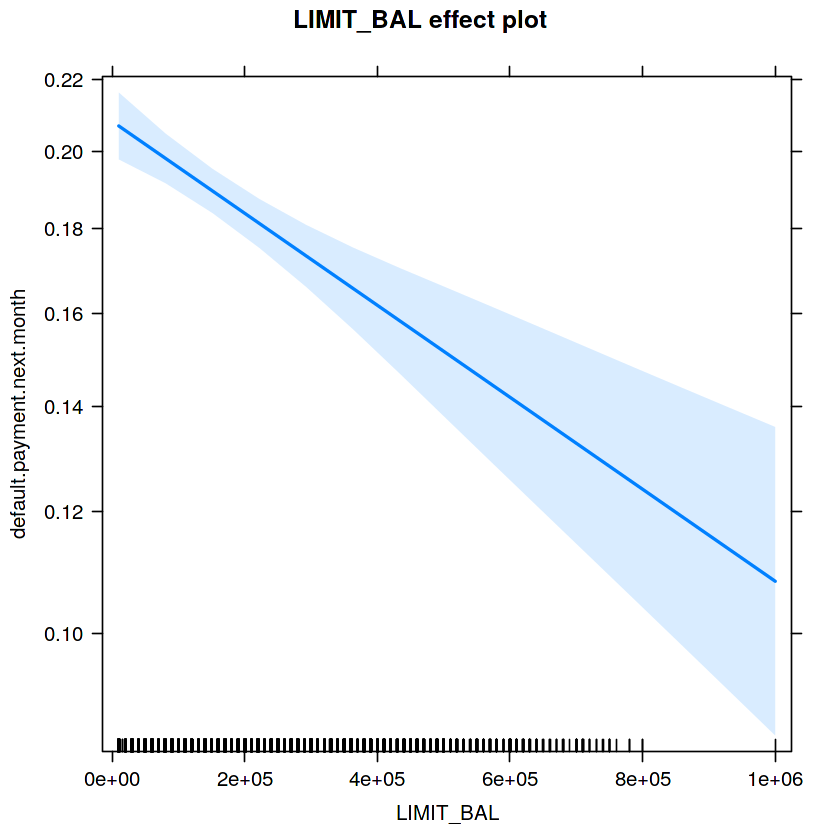

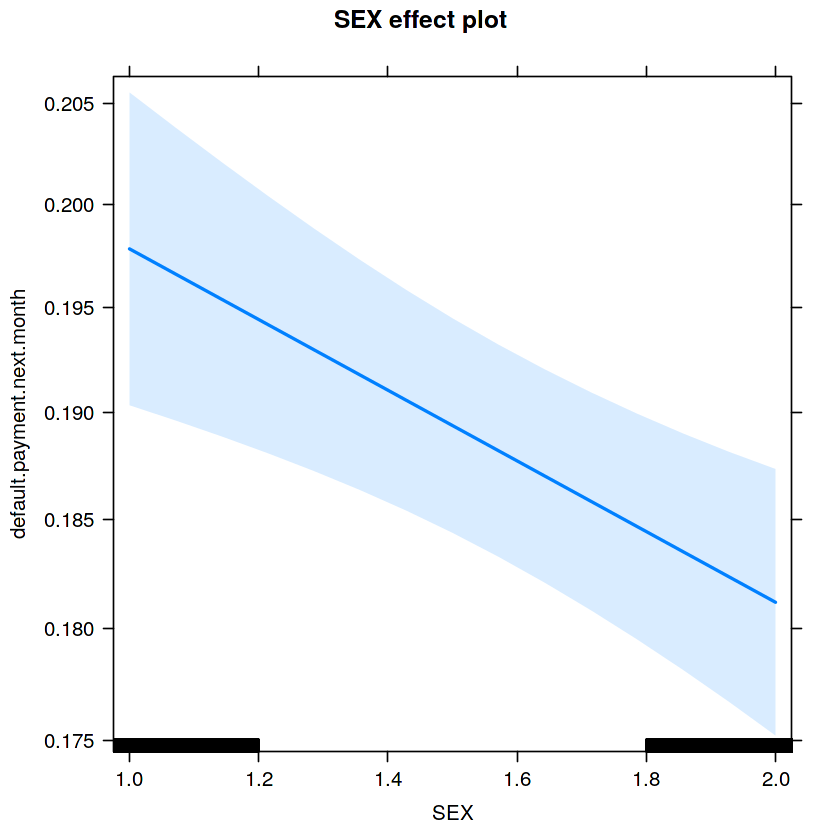

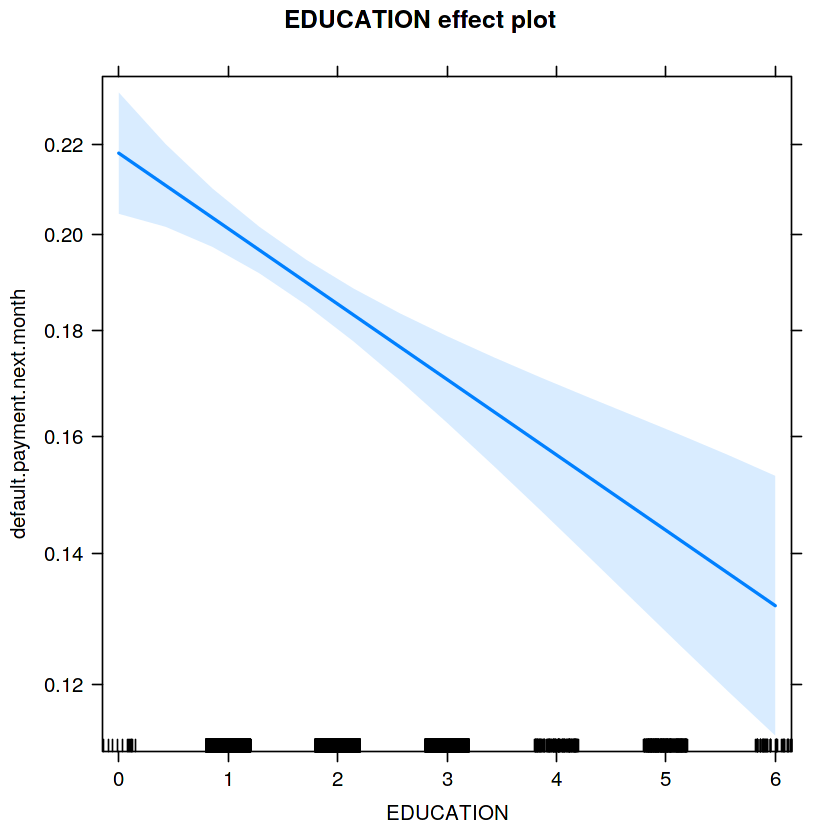

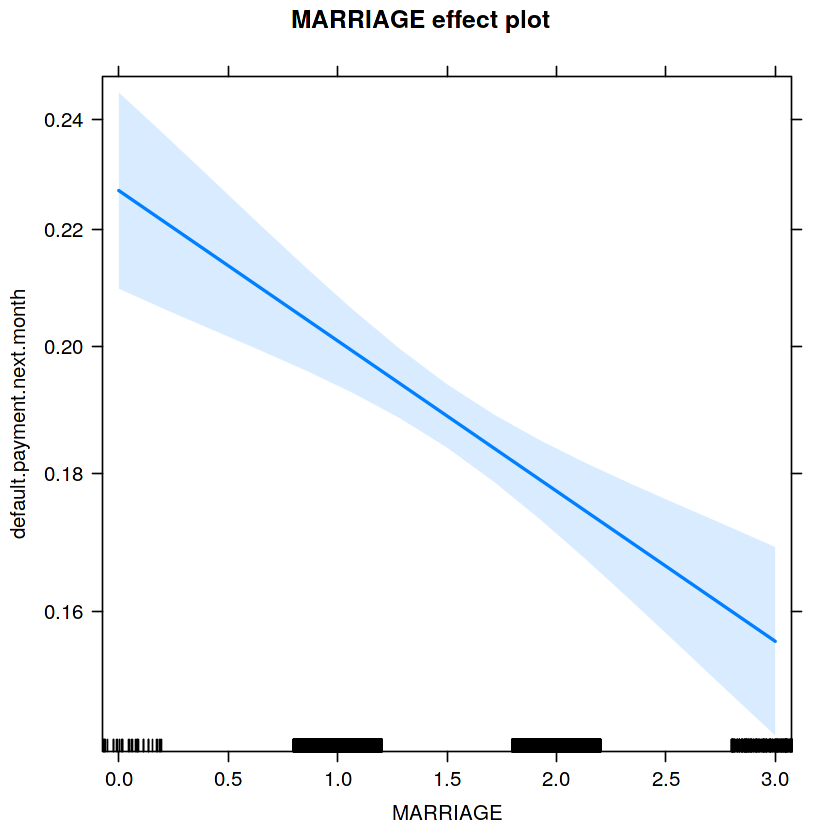

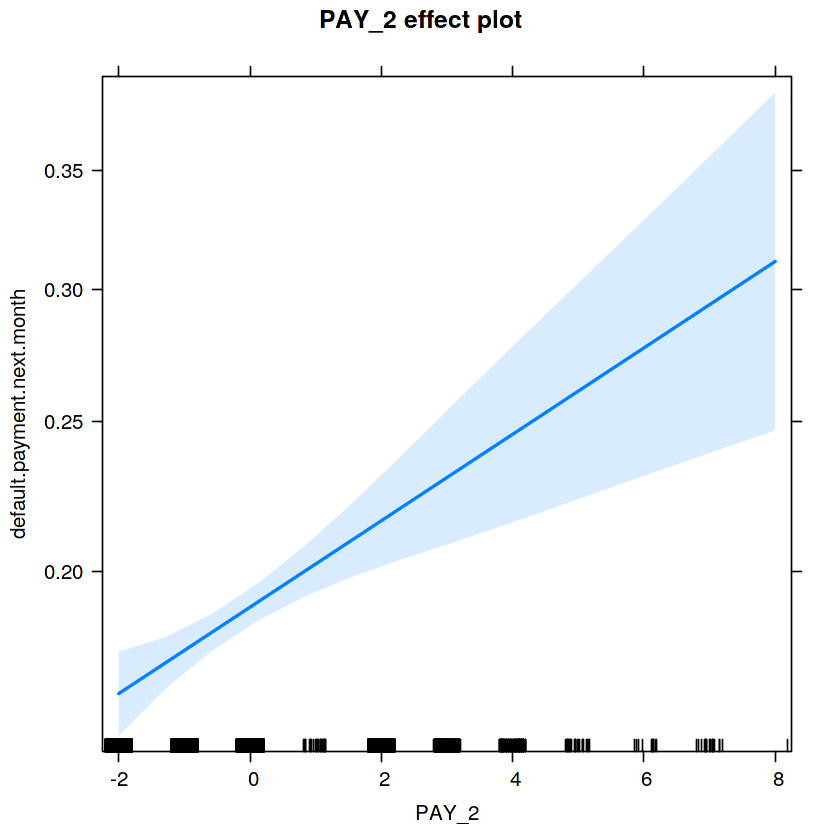

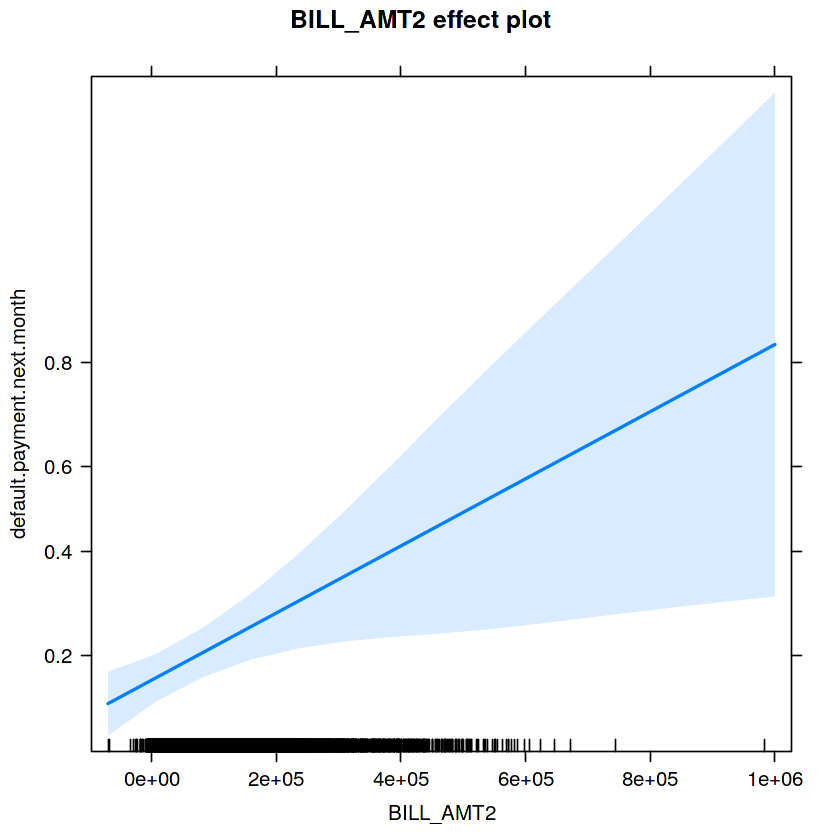

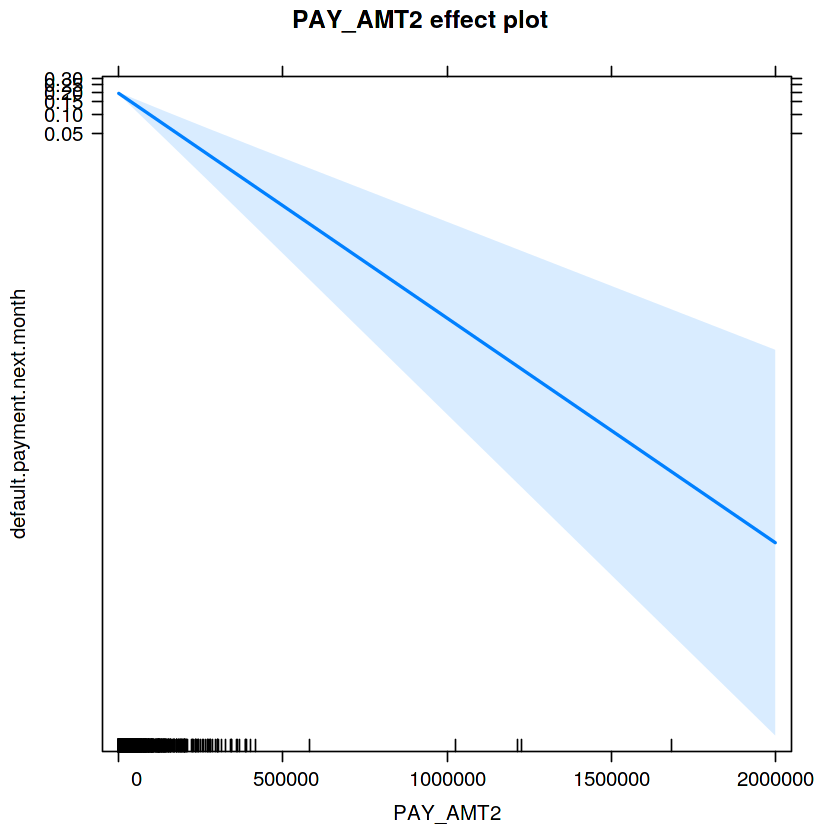

In [6]:
credit_effects <- allEffects(stepwise_regression_model)

#people with a higher credit limit are less likely to default
plot(credit_effects[1])
#men are more likely to default than women
plot(credit_effects[2])
#the more educated the person is, the less likely they are to default
plot(credit_effects[3])
#4. married people are more likely to default than single or other status person
plot(credit_effects[4])
#7. the less delay on payments they have previously, the less likely to default
plot(credit_effects[7])
#11. the higher the bill, the more likely they are to default
plot(credit_effects[11])
#14. the more they already borrowed and paid back, the less likely they are to default
plot(credit_effects[14])


**Interactions**<br>
These show how different variables used to build the model are interrelated. for instance, what is the effect on the outcome variable when looking at how men/women are more or less likely to default when changes are made to the credit limit.

In [7]:
stepwise_regression_model$formula

default.payment.next.month ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + 
    AGE + PAY_0 + PAY_2 + PAY_3 + PAY_5 + BILL_AMT1 + BILL_AMT2 + 
    BILL_AMT5 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + 
    PAY_AMT6

In [8]:
interactions <- glm(formula=default.payment.next.month ~ LIMIT_BAL + SEX + EDUCATION + MARRIAGE + 
    AGE + PAY_0 + PAY_2 + PAY_3 + PAY_5 + BILL_AMT1 + BILL_AMT2 + 
    BILL_AMT5 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + 
    PAY_AMT6 + SEX:LIMIT_BAL + LIMIT_BAL:AGE ,data=df_credit,family=binomial)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


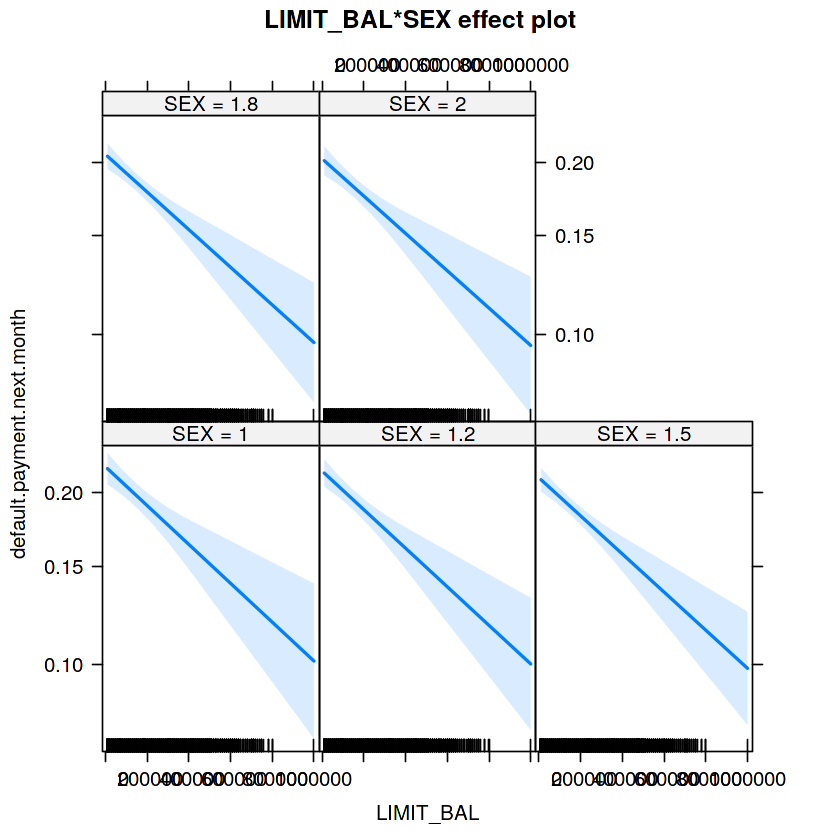

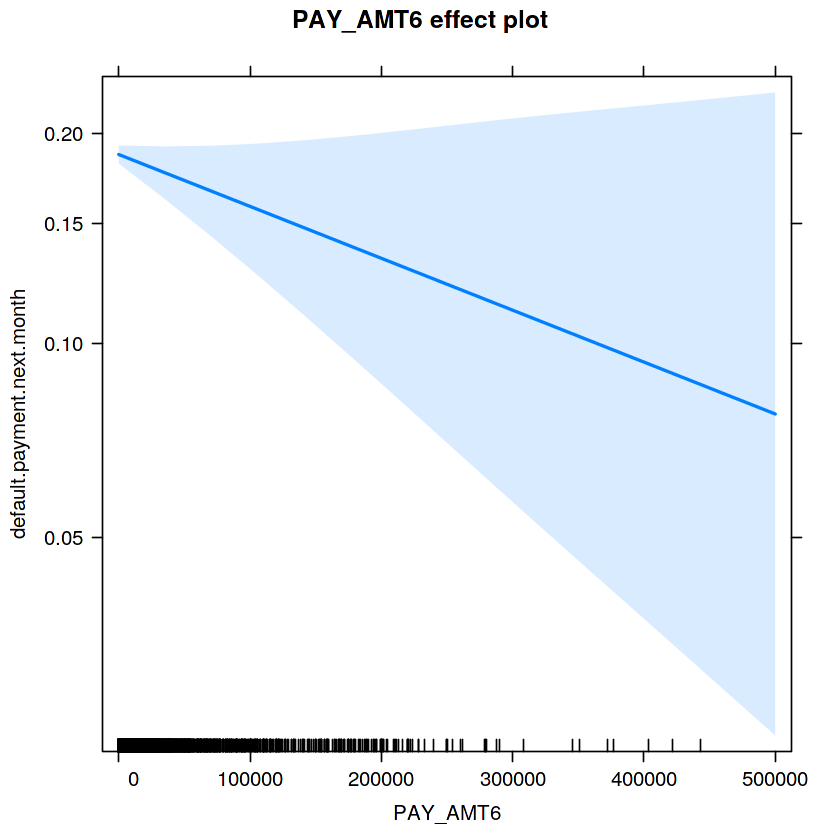

In [20]:
intr_plot <- allEffects(interactions)
plot(intr_plot[16])
plot(intr_plot[17])

In [10]:
library(glmnet)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 3.0-1




**Feature Selection**<br>
Lasson regression can be used for feature selection also, the below code demonstrates this.

In [11]:
xf <- c("LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", 
    "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_5", "BILL_AMT1", "BILL_AMT2", 
    "BILL_AMT5", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", 
    "PAY_AMT6")

df_factors_c <- select(df_credit, which(names(df_credit) %in% xf))
mat_facx <- as.matrix(df_factors_c)

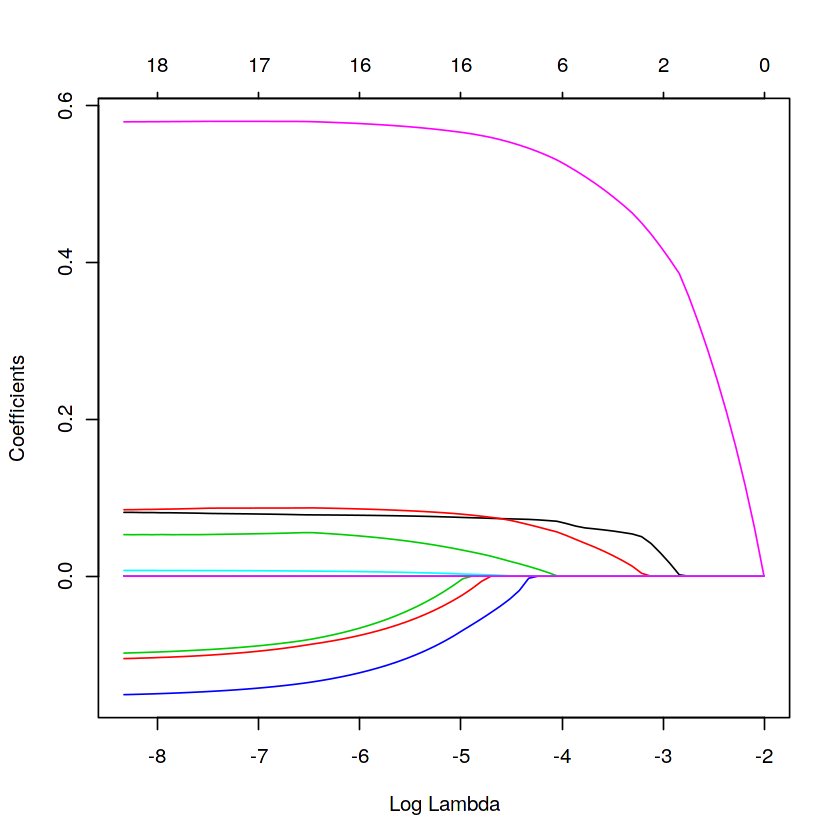

In [12]:
lasso_model <- glmnet(mat_facx,default.payment.next.month,alpha=1,family="binomial")
plot(lasso_model, xvar="lambda")

In [13]:
predict(lasso_model, type="coefficients")

   [[ suppressing 69 column names ‘s0’, ‘s1’, ‘s2’ ... ]]



19 x 69 sparse Matrix of class "dgCMatrix"
                                                                            
(Intercept) -1.258687 -1.25897628 -1.2614215 -1.2653424 -1.270263 -1.2758374
LIMIT_BAL    .         .           .          .          .         .        
SEX          .         .           .          .          .         .        
EDUCATION    .         .           .          .          .         .        
MARRIAGE     .         .           .          .          .         .        
AGE          .         .           .          .          .         .        
PAY_0        .         0.06106986  0.1156621  0.1649704  0.209903  0.2510624
PAY_2        .         .           .          .          .         .        
PAY_3        .         .           .          .          .         .        
PAY_5        .         .           .          .          .         .        
BILL_AMT1    .         .           .          .          .         .        
BILL_AMT2    .         .         

all of the variables in this model (originally created through stepwise) are considered significant. For comparison, can also check how lasso would perform on the full feature set present before stepwise was applied.

In [14]:
#names(df_credit)
ae <- c('ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0',
        'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2',
        'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2',
        'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6')
df_factors_c <- select(df_credit, which(names(df_credit) %in% ae))
mat_facx <- as.matrix(df_factors_c)

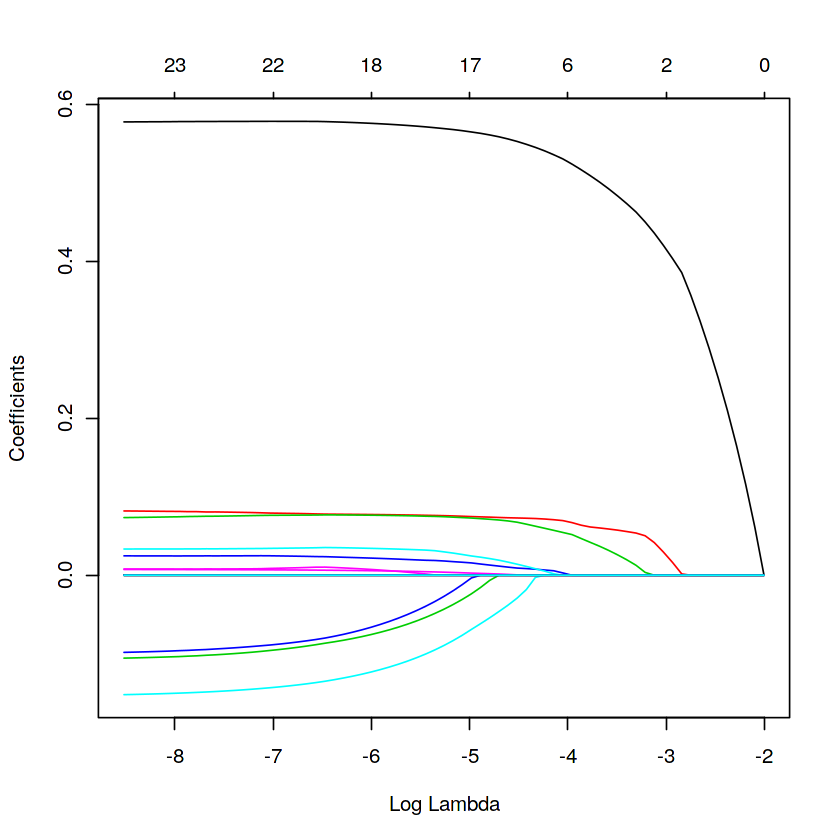

In [15]:
lasso_model <- glmnet(mat_facx,default.payment.next.month,alpha=1,family="binomial")
plot(lasso_model, xvar="lambda")

In [16]:
options(scipen=999) #surpress scientific notation for small numbers to improve readability
predict(lasso_model, type="coefficients")

   [[ suppressing 71 column names ‘s0’, ‘s1’, ‘s2’ ... ]]



25 x 71 sparse Matrix of class "dgCMatrix"
                                                                            
(Intercept) -1.258687 -1.25897628 -1.2614215 -1.2653424 -1.270263 -1.2758374
ID           .         .           .          .          .         .        
LIMIT_BAL    .         .           .          .          .         .        
SEX          .         .           .          .          .         .        
EDUCATION    .         .           .          .          .         .        
MARRIAGE     .         .           .          .          .         .        
AGE          .         .           .          .          .         .        
PAY_0        .         0.06106986  0.1156621  0.1649704  0.209903  0.2510624
PAY_2        .         .           .          .          .         .        
PAY_3        .         .           .          .          .         .        
PAY_4        .         .           .          .          .         .        
PAY_5        .         .         

The model suggests other featues not used in the stepwise model may also be significant, so this would require more investigation.